In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import sys
import numpy as np
import glob
import torch

sys.path.insert(1,"/home/showalte/research/prob_seq_queries/")
from seq_queries.utils import read_pkl, write_pkl

In [2]:
ref = [
    "In my opinion ... ",
    "with that said ...",
    "in other words ...",
    "            go ... ",
    "Hi, my name is ... ",
    "                    Where is ... ",
    "Once upon a ...",
    "I wish ...",
]
    
    

In [36]:
path = "../data/flashy/flashy_gpt2/val_dl/final_val-dl_flashy_gpt2_flashy_1000mc.pkl"
data = read_pkl(path)

In [37]:
samples = data['samples']

KeyError: 'samples'

In [18]:
(samples.long() == t)

AttributeError: 'torch.Size' object has no attribute 'long'

tensor([ 872,  722,  768, 1186, 1046, 1167,  936,  902])

In [25]:
check[check.sum(dim=-1)].shape

torch.Size([8, 1000])

In [20]:
terms = [30,13,0,26]
check = torch.stack([(samples ==t) for t in terms],dim=0).any(dim=0).long()
print(check.max())
check.shape

tensor(1)


torch.Size([8, 1000, 30])

In [24]:
first_ind = torch.argmax(check[check.sum(dim=-1) > 0],dim=-1)
first_ind.shape

torch.Size([5075])

In [6]:
data_dict = {"ref": ref,
             "samples":data['samples'],
             "target_terms":[30,13,0,26],
            }
write_pkl(data_dict,"frequentist-ablation_samples.pkl")

In [38]:
data['intermediate_query_probs'].shape

torch.Size([8, 31, 50257])

In [39]:
# print(data.keys())
df = data['intermediate_query_probs'][:,:,[30,13,0,26]].sum(dim=-1)

In [29]:
# pd.DataFrame(cdf.numpy()).to_csv('frequentist_counts_gpt-2.csv',index=None)

In [44]:
df.shape

torch.Size([8, 31])

In [45]:
# print(
write_pkl(df,"BEST_gpt_flashy.pkl")

In [830]:
# cdf = data['sample_counts']
# cdf = cdf/cdf.sum(dim=-1).unsqueeze(-1)
for k,v in data.items():
    print(k,v.shape)

sample_estimates torch.Size([8, 3, 50257])
sample_estimate_var torch.Size([8, 31])
sample_estimate_mean torch.Size([8, 0])
entropy_probs torch.Size([8, 31])
model_iters torch.Size([8, 3])
num_mc_samples torch.Size([8, 3])
intermediate_query_probs torch.Size([8, 31, 50257])
sample_counts torch.Size([8, 0])


AttributeError: 'dict' object has no attribute 'shape'

In [32]:
df.head()

AttributeError: 'Tensor' object has no attribute 'head'

In [33]:
# cdf.shapec
df.shape
write_pkl(df,"query_probability_tensor.pkl")

In [30]:
df_list = []
# df = cdf
for i in range(df.shape[0]):
    tdf = pd.DataFrame(df[i].numpy())
    tdf['label'] = ref[i]
    tdf['step'] = list(range(1,31+1,1))
    # print(tdf.head())
    df_list.append(tdf)
    # print(df[0].shape)
fdf = pd.concat(df_list,axis=0)
# fdf['step'] -= 0
# fdf[fdf.step == 0] = 0
fdf.shape
# fdf = fdf[fdf.step < 15]
fdf.columns = ['x','g','Steps in Sequence']
fdf.head()

,x,g,Steps in Sequence
0,0.000098,In my opinion ...,1
1,0.003687,In my opinion ...,2
2,0.004857,In my opinion ...,3
3,0.011724,In my opinion ...,4
4,0.012300,In my opinion ...,5


In [391]:
# fdf.to_csv("frequentist_counts_gpt2.csv",index=None)

In [392]:
# for i in range(7):
#     plt.figure(figsize = (12,8))
#     plt.bar(range(21),df[i].sum(dim=-1).numpy(),label=ref[i])
#     plt.legend()
#     plt.ylim(0,0.13)
#     plt.show()

In [35]:
df[4][0]

tensor(0.0001)

In [844]:
fdf.to_csv("gpt2_flashy_queries.csv",index=None)

/home/showalte/.conda/envs/nlpenv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


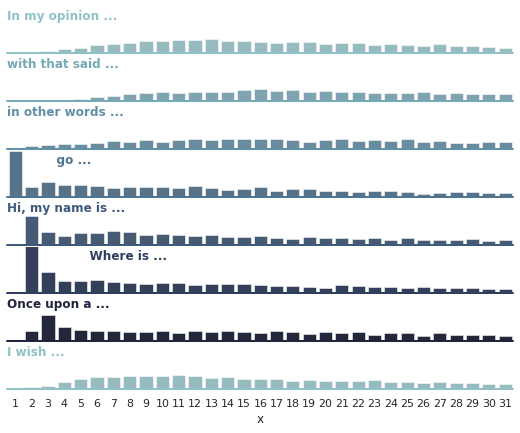

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# print(df.head())
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(fdf, row="g", hue="g", aspect=10, sharey=True,ylim=(0,0.11), height=0.8, palette=pal)

# Draw the densities in a few steps
g.map(sns.barplot,'Steps in Sequence','x',
      fill=True, alpha=1, linewidth=0.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .8, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.03)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# supxlabel("Steps")
g.despine(bottom=True, left=True)

## Flashy Apps

In [845]:
path = "../data/flashy/flashy_apps/val_dl/val-dl_flashy_apps_flashy_1000mc.pkl"
data = read_pkl(path)

# a_den = "../data/flashy/flashy_apps/val_dl/a_den_val-dl_flashy_apps_flashy_10000mc.pkl"
# a_den = read_pkl(a_den)['intermediate_query_probs'].sum(dim=1)
# b_den = "../data/flashy/flashy_apps/val_dl/b_den_val-dl_flashy_apps_flashy_10000mc.pkl"
# b_den = read_pkl(b_den)['intermediate_query_probs'].sum(dim=1)

In [846]:
# print(data['intermediate_query_probs'].shape)
# data = torch.LongTensor(samples).unsqueeze(-1)
# print(data)
# data = data.expand(9,16)
# data.shape
data['intermediate_query_probs'].shape

torch.Size([5000, 101, 88])

In [850]:
data.keys()
# for i in range(iqp.shape[0]):
#     print(torch.argmax(iqp[i]))

dict_keys(['sample_estimates', 'sample_estimate_var', 'sample_estimate_mean', 'entropy_probs', 'model_iters', 'num_mc_samples', 'intermediate_query_probs', 'sample_counts', 'metadata', 'excluded_terms'])

In [854]:
# plt.bar(range(iqp.shape[-1]), iqp[0])
samples = torch.LongTensor(data['metadata']['text_dict']['samples'])

samples.shape

torch.Size([5000, 20])

In [855]:
social_media = data['metadata']['text_dict']['social_media']
comms = data['metadata']['text_dict']['comms']
data_dict = {"comms": comms,
             "socials":social_media,
             "samples":samples,
             "intermediate_query_probs":data['intermediate_query_probs'],
            }

write_pkl(data_dict, "tau_a-ablation_data_dict.pkl")

In [805]:
samps = data['metadata']['text_dict']['samples']

In [795]:

comms

[18, 19, 33, 34, 47, 78, 52, 55, 57, 67]

In [856]:
iqp = data['intermediate_query_probs']
iqp = iqp.sum(dim=1)
print(iqp.shape)
a_b = iqp[...,list(set(social_media))].sum(dim=-1)#/a_den[:,social_media].sum(dim=-1)
b_a = iqp[...,list(set(comms))].sum(dim=-1)#/b_den[:,comms].sum(dim=-1)

torch.Size([5000, 88])


In [857]:
samps[0]

tensor([ 3, 14, 78, 79, 57, 14, 47, 84, 73, 57, 34, 79, 81,  3, 84, 40, 33, 23,
        34, 14])

In [866]:
comms_counts.unique()

tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000,
        0.4500, 0.5000, 0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500,
        0.9000, 0.9500])

In [862]:
comms_counts = sum(samples == t for t in social_media).sum(dim=-1)/samples.shape[-1]
soc_counts = 1 - comms_counts

In [863]:
a_b_means = [a_b[comms_counts == p].mean() for p in np.arange(0,1,0.05)]
b_a_means = [b_a[comms_counts == p].mean() for p in np.arange(0,1,0.05)]

<AxesSubplot:>

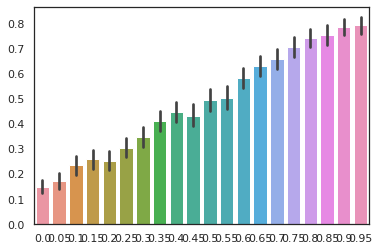

In [865]:
sns.barplot(x=comms_counts.numpy(), y=a_b.numpy())

<AxesSubplot:>

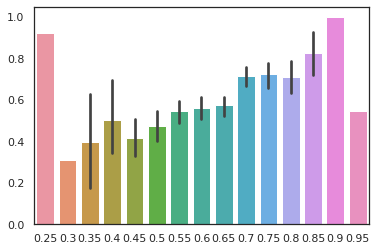

In [838]:
sns.barplot(x=comms_counts.numpy(), y=a_b.numpy())

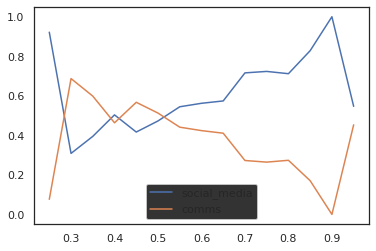

In [825]:
plt.plot(np.arange(0,1,0.05),a_b_means, label='social_media')
plt.plot(np.arange(0,1,0.05),b_a_means, label='comms')
plt.legend()

<BarContainer object of 10 artists>

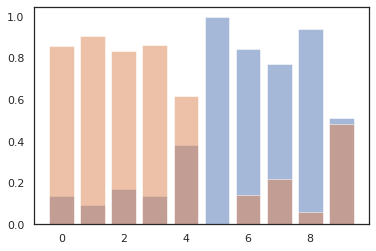

In [743]:
plt.bar(range(len(a_b)),a_b,alpha=0.5)
plt.bar(range(len(b_a)),b_a,alpha=0.5)

In [540]:
labels = ['s','s','s7p3','s5p5','s3p7','p','p']
def flatten(tensor,labels):
    df_list = []
    for i in range(tensor.shape[0]):
        tdf = pd.DataFrame(tensor[i].numpy())
        tdf['label'] = labels[i]
        tdf['step'] = list(range(1,tensor.shape[1]+1,1))
        df_list.append(tdf)
        # print(df[0].shape)
    df = pd.concat(df_list,axis=0)
    return df

In [41]:
df = flatten(a_b,labels)
df.shape

(147, 3)

In [45]:
# fdf['step'] -= 0
# fdf[fdf.step == 0] = 0
df.columns = ['x','g','y']
# fdf['x'] = np.log(fdf.x + 1e-5)
df.head()
fdf=df

/home/showalte/.conda/envs/nlpenv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


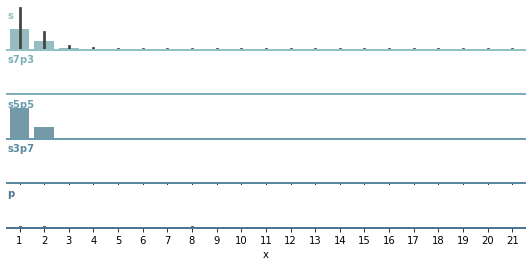

In [46]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(9, rot=-.25, light=.7)
g = sns.FacetGrid(fdf, row="g", hue="g", aspect=10, sharey=True, height=0.8, palette=pal)

# Draw the densities in a few steps
g.map(sns.barplot,'y','x',
      fill=True, alpha=1, linewidth=0.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .8, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.03)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# supxlabel("Steps")
g.despine(bottom=True, left=True)